In [1]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading in data
df = pd.read_excel("hotdog-contest-winners.xlsm")
df.head(10)

,Year,Winner,Dogs eaten,Country,New record
0,1980,Paul Siederman & Joe Baldini,9.10,United States,0
1,1981,Thomas DeBerry,11.00,United States,0
2,1982,Steven Abrams,11.00,United States,0
3,1983,Luis Llamas,19.50,Mexico,0
4,1984,Birgit Felden,9.50,Germany,0
5,1985,Oscar Rodriguez,11.75,United States,0
6,1986,Mark Heller,15.50,United States,0
7,1987,Don Wolfman,12.00,United States,0
8,1988,Jay Green,14.00,United States,0
9,1989,Jay Green,13.00,United States,0


### Bar Chart

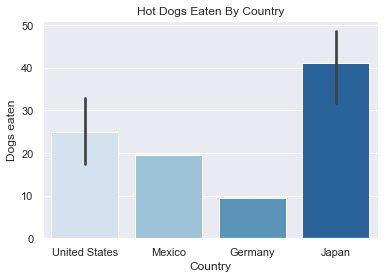

In [88]:
#Creating bar chart and saving as image
sns.barplot(x = 'Country', y = 'Dogs eaten', data = df, palette = 'Blues').set(title = 'Hot Dogs Eaten By Country')
plt.savefig('Bar Chart.png')

### Stacked Bar Chart

In [58]:
#Grouping into new dataframes
df1 = df.groupby(['Country']).size().reset_index(name='number_of_winners')
df2 = df.groupby(['Country']).sum().reset_index()

In [59]:
#Dropping year sum column
df2.drop(columns = ['Year'], inplace=True)


In [60]:
df2


,Country,Dogs eaten,New record
0,Germany,9.50,0
1,Japan,369.88,6
2,Mexico,19.50,0
3,United States,499.85,4


In [61]:
df1

,Country,number_of_winners
0,Germany,1
1,Japan,9
2,Mexico,1
3,United States,20


In [62]:
#Merging Data frames
df2['number_winners']=df1['number_of_winners']

In [66]:
df2.drop(columns=['Dogs eaten'],inplace=True)

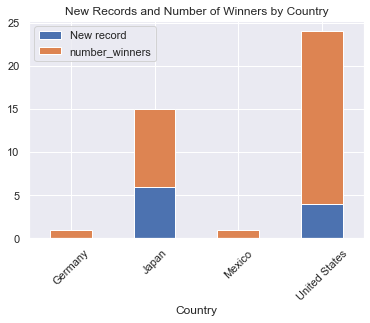

In [87]:
#Creating stacked bar chart and saving as image
df2.set_index('Country').plot(kind='bar',stacked=True)
plt.xticks(rotation = 45)
plt.title('New Records and Number of Winners by Country')
plt.savefig('Stacked Bar Chart.png', bbox_inches='tight')

### Pie Chart

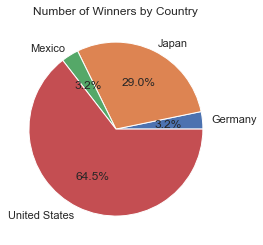

In [85]:
#Creating pie chart and saving image
labels = ['Germany','Japan','Mexico', 'United States']
df1.plot(kind='pie', y = 'number_of_winners', labels = labels,legend=False,title='Number of Winners by Country',autopct='%1.1f%%')
plt.axis('off')
plt.savefig('Pie Chart.png')

### Donut Chart

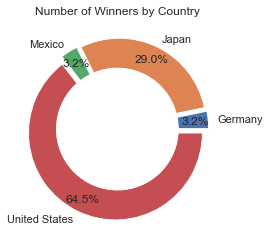

In [84]:
#Creating Donut chart and saving image
# explosion
explode = (0.05, 0.05, 0.05, 0.05)
df1.plot(kind='pie', y = 'number_of_winners', labels = labels,legend=False,title='Number of Winners by Country',
         autopct='%1.1f%%',explode=explode,pctdistance=0.85)
center_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.axis('off')
plt.title('Number of Winners by Country')
plt.savefig('Donut Chart.png')